In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='bert-base-uncased'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'g':[]}

In [4]:
gamma = [2,4,8,16]
lr = 1.0e-4

for g in gamma:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss gamma {g}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       focalloss=True,
                                                       gamma=g,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search bert-base-uncased, learning rate 0.0001, focal loss gamma 2


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.3150	Val Loss:	0.5824	Accuracy:	0.7505	F1:	0.7162
2 / 30: Train Loss:	0.2114	Val Loss:	0.4516	Accuracy:	0.8184	F1:	0.7661
3 / 30: Train Loss:	0.1343	Val Loss:	0.4526	Accuracy:	0.7899	F1:	0.7602
4 / 30: Train Loss:	0.0957	Val Loss:	0.3677	Accuracy:	0.8446	F1:	0.7783
5 / 30: Train Loss:	0.0574	Val Loss:	0.5623	Accuracy:	0.7221	F1:	0.7037
6 / 30: Train Loss:	0.0479	Val Loss:	0.4109	Accuracy:	0.8534	F1:	0.8151
7 / 30: Train Loss:	0.0550	Val Loss:	0.6394	Accuracy:	0.6937	F1:	0.6798
8 / 30: Train Loss:	0.0532	Val Loss:	0.3485	Accuracy:	0.8446	F1:	0.7989
9 / 30: Train Loss:	0.0044	Val Loss:	0.3913	Accuracy:	0.8556	F1:	0.8145
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.70      0.76      0.73       119
      struct       0.91      0.88      0.90       338

    accuracy                           0.85       457
   macro avg       0.81      0.82      0.82   

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.0862	Val Loss:	0.6186	Accuracy:	0.7243	F1:	0.6895
2 / 30: Train Loss:	0.0592	Val Loss:	0.5259	Accuracy:	0.8381	F1:	0.7615
3 / 30: Train Loss:	0.0360	Val Loss:	0.5101	Accuracy:	0.7834	F1:	0.7345
4 / 30: Train Loss:	0.0243	Val Loss:	0.4099	Accuracy:	0.8337	F1:	0.7725
5 / 30: Train Loss:	0.0116	Val Loss:	0.5404	Accuracy:	0.7024	F1:	0.6858
6 / 30: Train Loss:	0.0186	Val Loss:	0.6484	Accuracy:	0.6149	F1:	0.6088
7 / 30: Train Loss:	0.0138	Val Loss:	0.5788	Accuracy:	0.6958	F1:	0.6799
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.71      0.61      0.65       119
      struct       0.87      0.91      0.89       338

    accuracy                           0.83       457
   macro avg       0.79      0.76      0.77       457
weighted avg       0.83      0.83      0.83       457

test results:
              precision    recall  f1-score   support

       bknow

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.0060	Val Loss:	0.6438	Accuracy:	0.7790	F1:	0.7240
2 / 30: Train Loss:	0.0038	Val Loss:	0.6278	Accuracy:	0.7746	F1:	0.7431
3 / 30: Train Loss:	0.0033	Val Loss:	0.4605	Accuracy:	0.8381	F1:	0.7713
4 / 30: Train Loss:	0.0061	Val Loss:	0.6213	Accuracy:	0.8031	F1:	0.7236
5 / 30: Train Loss:	0.0021	Val Loss:	0.5652	Accuracy:	0.8228	F1:	0.7488
6 / 30: Train Loss:	0.0012	Val Loss:	0.5122	Accuracy:	0.7856	F1:	0.7552
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.75      0.57      0.65       119
      struct       0.86      0.93      0.89       338

    accuracy                           0.84       457
   macro avg       0.80      0.75      0.77       457
weighted avg       0.83      0.84      0.83       457

test results:
              precision    recall  f1-score   support

       bknow       0.75      0.58      0.66        67
      struct       0.86      0

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.0000	Val Loss:	0.6792	Accuracy:	0.6849	F1:	0.6594
2 / 30: Train Loss:	0.0000	Val Loss:	0.6638	Accuracy:	0.7921	F1:	0.7559
3 / 30: Train Loss:	0.0000	Val Loss:	0.6626	Accuracy:	0.6543	F1:	0.6447
4 / 30: Train Loss:	0.0000	Val Loss:	0.6501	Accuracy:	0.6937	F1:	0.6773
5 / 30: Train Loss:	0.0000	Val Loss:	0.6907	Accuracy:	0.5952	F1:	0.5881
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.57      0.78      0.66       119
      struct       0.91      0.80      0.85       338

    accuracy                           0.79       457
   macro avg       0.74      0.79      0.76       457
weighted avg       0.82      0.79      0.80       457

test results:
              precision    recall  f1-score   support

       bknow       0.51      0.75      0.61        67
      struct       0.89      0.75      0.81       189

    accuracy                           0.75    

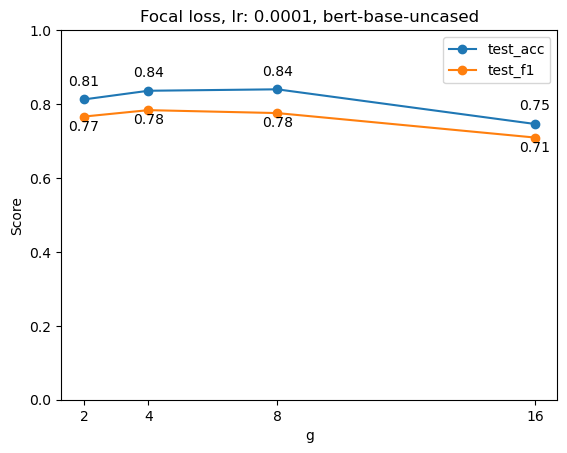

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Focal loss, lr: {lr}, {model_checkpoint}',
                        column='g',
                        sci_format=False)

In [6]:
%reset -f